# File system and operating system

In [110]:
from pathlib import Path
import os.path
from datetime import datetime, timedelta
from zipfile import ZipFile
from PIL import Image
import pandas as pd
import csv
import json

## File system

In [3]:
current_dir = Path('.')
current_dir

WindowsPath('.')

In [5]:
absolute_path = current_dir.absolute()
absolute_path

WindowsPath('C:/Users/Aelion/Documents/PythonPoo/FileOs')

In [6]:
print(absolute_path)

C:\Users\Aelion\Documents\PythonPoo\FileOs


In [8]:
training_dir = Path('C:\\Users\\Aelion\\Documents\\PythonPoo')
training_dir

WindowsPath('C:/Users/Aelion/Documents/PythonPoo')

In [9]:
training_dir = Path('C:/Users/Aelion/Documents/PythonPoo')
training_dir

WindowsPath('C:/Users/Aelion/Documents/PythonPoo')

In [11]:
# iterdir returns a generator (lazy object)
list(current_dir.iterdir())

[WindowsPath('.ipynb_checkpoints'),
 WindowsPath('files.ipynb'),
 WindowsPath('Photos.7z'),
 WindowsPath('Photos.zip')]

In [26]:
for file in current_dir.iterdir():
    print(file)
    print(file.absolute())
    print(file.name)
    print(
        'directory:', file.is_dir(),
        '; file:', file.is_file()
    )
    if file.is_file():
        metadata = file.stat()
        modified_date = datetime.fromtimestamp(metadata.st_mtime)
        print("last modified:", modified_date)
        print("size:", metadata.st_size)
        # alt. using os.path
        modified_date2 = os.path.getmtime(file) # accept path object
        modified_date3 = os.path.getmtime(str(file)) # accept text path 
        print(modified_date2, modified_date3)
    print()

.ipynb_checkpoints
C:\Users\Aelion\Documents\PythonPoo\FileOs\.ipynb_checkpoints
.ipynb_checkpoints
directory: True ; file: False

files.ipynb
C:\Users\Aelion\Documents\PythonPoo\FileOs\files.ipynb
files.ipynb
directory: False ; file: True
last modified: 2024-06-14 10:16:46.898154
size: 6383
1718353006.8981535 1718353006.8981535

Photos.7z
C:\Users\Aelion\Documents\PythonPoo\FileOs\Photos.7z
Photos.7z
directory: False ; file: True
last modified: 2024-06-14 09:17:11.814491
size: 1423278
1718349431.8144908 1718349431.8144908

Photos.zip
C:\Users\Aelion\Documents\PythonPoo\FileOs\Photos.zip
Photos.zip
directory: False ; file: True
last modified: 2024-06-14 09:18:46.651875
size: 1734885
1718349526.6518745 1718349526.6518745



In [19]:
1718351706 / 3600 / 24 / 365

54.488575152207005

In [22]:
datetime.now() - timedelta(seconds=1718351706)

datetime.datetime(1970, 1, 1, 2, 9, 0, 576529)

## extract archive

In [28]:
archive_path = Path('Photos.zip')
archive_path.exists() and archive_path.is_file()

True

NB: logical operator: or and not

In [32]:
with ZipFile(archive_path) as archive:
    archive.extractall()
# auto: archive.close()

## Explore tree + filter

In [88]:
photo_dir = Path('Photos/')
photo_dir.exists and photo_dir.is_dir()

True

In [89]:
for photo_path in photo_dir.glob('**/*.jpg'):
    print(photo_path)

Photos\IMG_20201024_155325.jpg
Photos\Set1\IMG_20200711_110837.jpg
Photos\Set1\IMG_20200711_120450.jpg
Photos\Set1\IMG_20200731_112734.jpg
Photos\Set1\IMG_20200731_124909.jpg
Photos\Set1\IMG_20200731_124939.jpg
Photos\Set1\IMG_20200731_134742.jpg
Photos\Set1\IMG_20200809_101205.jpg
Photos\Set1\IMG_20200809_111130.jpg
Photos\Set1\IMG_20200809_124231.jpg
Photos\Set1\IMG_20200809_125816.jpg
Photos\Set1\IMG_20200821_104500.jpg
Photos\Set1\IMG_20200905_113751.jpg
Photos\Set1\IMG_20200913_192604.jpg
Photos\Set1\IMG_20200927_122751.jpg
Photos\Set1\IMG_20200927_131116.jpg
Photos\Set1\IMG_20200927_152228.jpg
Photos\Set1\IMG_20201024_155325.jpg
Photos\Set1\other\IMG_20200711_090914.jpg
Photos\Set2\IMG_20200821_104500.jpg
Photos\Set2\IMG_20200821_112947.jpg
Photos\Set2\IMG_20200823_120734.jpg
Photos\Set2\IMG_20200823_123302.jpg
Photos\Set2\IMG_20200823_125206.jpg
Photos\Set2\IMG_20200905_113751.jpg
Photos\Set2\IMG_20200905_114619.jpg
Photos\Set2\IMG_20200905_124848.jpg
Photos\Set2\IMG_20200905_12

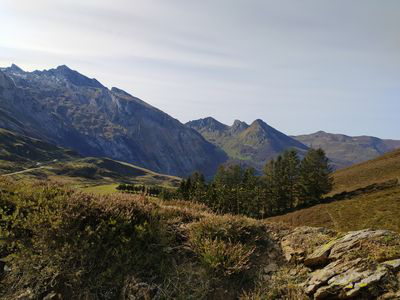

In [90]:
# work on last image
img = Image.open(photo_path)
img

In [91]:
print(img.size, img.getexif())

(400, 300) {34853: 847, 296: 2, 34665: 264, 271: 'Xiaomi', 272: 'Redmi Note 8T', 305: 'willow-user 9 PKQ1.190616.001 V11.0.7.0.PCXEUXM release-keys', 274: 1, 306: '2020:10:24 15:12:54', 531: 1, 282: 72.0, 283: 72.0}


In [92]:
img.close()

In [93]:
print(photo_path.name)
tag_date =photo_path.name[4:12]
year = tag_date[:4]
month = tag_date[4:6]
day = tag_date[6:]
year, month, day

IMG_20201024_151252.jpg


('2020', '10', '24')

In [94]:
photo_dest_dir = Path('Photos_Archives') / year / month / day
photo_dest_dir.exists()

True

In [95]:
photo_dest_dir.mkdir(exist_ok=True, parents=True)

In [96]:
photo_dest = photo_dest_dir / photo_path.name
photo_dest

WindowsPath('Photos_Archives/2020/10/24/IMG_20201024_151252.jpg')

In [97]:
# move
photo_path.rename(photo_dest)

WindowsPath('Photos_Archives/2020/10/24/IMG_20201024_151252.jpg')

NB: see also: os.path, shutil
move, delete, copy, ...

## CSV Files

### Encoding
- 1 character = 1 byte (fr: octet)
    - ASCII: 128 caractères A-Z a-z 0-0 + special characters
    - latin 1 = ISO-8859-1 (256)
    - ISO-8859-15 (256) + €, œ, Œ, Ÿ
    - cp1252/ANSI (256) + €, œ, Œ, Ÿ
- 1 character = 1+ byte(s)
    - UNICODE: ~150000
        - UTF-8
        - UTF-16
        - UTF-32

In [100]:
2**7, 2**8

(128, 256)

In [103]:
"cœur".upper(), "ÿ".upper()

('CŒUR', 'Ÿ')

In [104]:
city = "L'Haÿ-les-Roses"
city.upper()

"L'HAŸ-LES-ROSES"

### Basic Reading

In [107]:
# open in mode r=read and t=text
f = open('data/cities.csv', encoding='UTF-8')
f

<_io.TextIOWrapper name='data/cities.csv' mode='r' encoding='UTF-8'>

In [108]:
lines = list(f)
f.close()

In [109]:
lines[:3]

['insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name\n',
 '25620,ville du pont,25650,ville du pont,46.999873398,6.498147193,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté\n',
 '25624,villers grelot,25640,villers grelot,47.361512085,6.235167025,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté\n']

### CSV Reader
module csv
- reader/writer: list of list
- DictReader/DictWriter: list pf dict

In [118]:
with open('data/cities.csv', encoding="UTF-8", newline='') as f:
    reader = csv.reader(f, delimiter=',')
    headers = next(reader)
    data = list(reader)
print(headers)
data[:4]

['insee_code', 'city_code', 'zip_code', 'label', 'latitude', 'longitude', 'department_name', 'department_number', 'region_name', 'region_geojson_name']


[['25620',
  'ville du pont',
  '25650',
  'ville du pont',
  '46.999873398',
  '6.498147193',
  'doubs',
  '25',
  'bourgogne-franche-comté',
  'Bourgogne-Franche-Comté'],
 ['25624',
  'villers grelot',
  '25640',
  'villers grelot',
  '47.361512085',
  '6.235167025',
  'doubs',
  '25',
  'bourgogne-franche-comté',
  'Bourgogne-Franche-Comté'],
 ['25615',
  'villars les blamont',
  '25310',
  'villars les blamont',
  '47.368383721',
  '6.871414913',
  'doubs',
  '25',
  'bourgogne-franche-comté',
  'Bourgogne-Franche-Comté'],
 ['25619',
  'les villedieu',
  '25240',
  'les villedieu',
  '46.713906258',
  '6.26583065',
  'doubs',
  '25',
  'bourgogne-franche-comté',
  'Bourgogne-Franche-Comté']]

In [119]:
len(data)

39145

### Pandas

In [121]:
df1 = pd.DataFrame(data, columns=headers)
df1

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
0,25620,ville du pont,25650,ville du pont,46.999873398,6.498147193,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
1,25624,villers grelot,25640,villers grelot,47.361512085,6.235167025,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
2,25615,villars les blamont,25310,villars les blamont,47.368383721,6.871414913,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
3,25619,les villedieu,25240,les villedieu,46.713906258,6.26583065,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
4,25622,villers buzon,25170,villers buzon,47.228558434,5.852186748,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
...,...,...,...,...,...,...,...,...,...,...
39140,98829,thio,98829,thio,,,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39141,98831,voh,98833,voh,,,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39142,98832,yate,98834,yate,,,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39143,98612,sigave,98620,sigave,-14.270411199,-178.155263035,wallis-et-futuna,986,wallis-et-futuna,Wallis-et-Futuna


In [134]:
df_cities = pd.read_csv('data/cities.csv', sep=',', encoding='UTF-8', dtype={'zip_code':'str'})
df_cities.head(3)

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
0,25620,ville du pont,25650,ville du pont,46.999873,6.498147,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
1,25624,villers grelot,25640,villers grelot,47.361512,6.235167,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
2,25615,villars les blamont,25310,villars les blamont,47.368384,6.871415,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté


In [135]:
type(df_cities)

pandas.core.frame.DataFrame

In [136]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39145 entries, 0 to 39144
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   insee_code           39145 non-null  object 
 1   city_code            39145 non-null  object 
 2   zip_code             39145 non-null  object 
 3   label                39145 non-null  object 
 4   latitude             38934 non-null  float64
 5   longitude            38934 non-null  float64
 6   department_name      39145 non-null  object 
 7   department_number    39145 non-null  object 
 8   region_name          39145 non-null  object 
 9   region_geojson_name  39145 non-null  object 
dtypes: float64(2), object(8)
memory usage: 3.0+ MB


In [138]:
# print(sorted(df_cities.zip_code.unique()))

In [140]:
# type Series: column or row
df_cities.label

0              ville du pont
1             villers grelot
2        villars les blamont
3              les villedieu
4              villers buzon
                ...         
39140                   thio
39141                    voh
39142                   yate
39143                 sigave
39144                   uvea
Name: label, Length: 39145, dtype: object

In [141]:
df_cities['label']

0              ville du pont
1             villers grelot
2        villars les blamont
3              les villedieu
4              villers buzon
                ...         
39140                   thio
39141                    voh
39142                   yate
39143                 sigave
39144                   uvea
Name: label, Length: 39145, dtype: object

In [143]:
# 2+ columns
df_cities[['label','zip_code']]

,label,zip_code
0,ville du pont,25650
1,villers grelot,25640
2,villars les blamont,25310
3,les villedieu,25240
4,villers buzon,25170
...,...,...
39140,thio,98829
39141,voh,98833
39142,yate,98834
39143,sigave,98620


In [147]:
df_cities.sort_values(['department_number','label'], inplace=True)
df_cities

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
5528,01004,amberieu en bugey,01500,amberieu en bugey,45.961049,5.372275,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
20381,01005,amberieux en dombes,01330,amberieux en dombes,45.996164,4.911967,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
20382,01006,ambleon,01300,ambleon,45.749886,5.594585,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
4640,01007,ambronay,01500,ambronay,46.005691,5.357749,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
4605,01008,ambutrix,01500,ambutrix,45.936683,5.332447,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
...,...,...,...,...,...,...,...,...,...,...
39123,98830,touho,98831,touho,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39118,98809,l ile des pins,98832,vao,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39141,98831,voh,98833,voh,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39107,98814,lifou,98820,we,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
